<a href="https://colab.research.google.com/github/priyarajmohan/ML_projects/blob/main/unsupervised_kmeans_PCA_Elbow_amazon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [ ]:
amazon = pd.read_csv('/content/Amazon Echo 2 Reviews.csv')

In [ ]:
amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6855 entries, 0 to 6854
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Pageurl              6855 non-null   object 
 1   Title                6855 non-null   object 
 2   Review Text          6850 non-null   object 
 3   Review Color         6855 non-null   object 
 4   User Verified        6641 non-null   object 
 5   Review Date          6855 non-null   object 
 6   Review Useful Count  28 non-null     float64
 7   Configuration Text   6855 non-null   object 
 8   Rating               6855 non-null   int64  
 9   Declaration Text     6 non-null      object 
dtypes: float64(1), int64(1), object(8)
memory usage: 535.7+ KB


In [ ]:
amazon.isnull().sum()

,0
Pageurl,0
Title,0
Review Text,5
Review Color,0
User Verified,214
Review Date,0
Review Useful Count,6827
Configuration Text,0
Rating,0
Declaration Text,6849


In [ ]:
a = ['Review Text','User Verified','Declaration Text']

In [ ]:
for i in a:
  amazon[i].fillna('unknown',inplace=True)

/tmp/ipython-input-1731736741.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  amazon[i].fillna('unknown',inplace=True)


In [ ]:
amazon.isnull().sum()

,0
Pageurl,0
Title,0
Review Text,0
Review Color,0
User Verified,0
Review Date,0
Review Useful Count,6827
Configuration Text,0
Rating,0
Declaration Text,0


In [ ]:
amazon['Review Useful Count'] = amazon['Review Useful Count'].fillna(0)


In [ ]:
amazon.isnull().sum()

,0
Pageurl,0
Title,0
Review Text,0
Review Color,0
User Verified,0
Review Date,0
Review Useful Count,0
Configuration Text,0
Rating,0
Declaration Text,0


In [ ]:
amazon.duplicated().sum()

np.int64(0)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


In [ ]:
for i in amazon.select_dtypes(include='object').columns:
  amazon[i] = le.fit_transform(amazon[i])

In [ ]:
amazon

,Pageurl,Title,Review Text,Review Color,User Verified,Review Date,Review Useful Count,Configuration Text,Rating,Declaration Text
0,2612,2783,3714,0,0,19,0,0,3,4
1,2612,880,1213,1,0,44,0,0,4,4
2,2788,408,371,1,0,54,0,0,5,4
3,2788,870,3239,0,0,10,0,0,5,4
4,2788,870,1130,0,0,34,0,0,5,4
...,...,...,...,...,...,...,...,...,...,...
6850,1287,1638,4617,0,0,34,0,0,5,4
6851,1287,870,2410,1,0,33,0,0,5,4
6852,2521,2940,1567,0,0,44,0,0,3,4
6853,2202,2511,1776,0,0,45,0,0,5,4


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()


In [ ]:
for i in amazon.columns:
  amazon[i] = sc.fit_transform(amazon[[i]])

In [ ]:
amazon

,Pageurl,Title,Review Text,Review Color,User Verified,Review Date,Review Useful Count,Configuration Text,Rating,Declaration Text
0,0.709048,1.476291,0.480230,-0.516815,-0.179511,-0.989388,0.0,-0.012079,-0.948560,0.027441
1,0.709048,-0.658967,-1.010531,1.934928,-0.179511,0.704922,0.0,-0.012079,-0.162679,0.027441
2,0.876118,-1.188574,-1.512419,1.934928,-0.179511,1.382646,0.0,-0.012079,0.623202,0.027441
3,0.876118,-0.670188,0.197099,-0.516815,-0.179511,-1.599339,0.0,-0.012079,0.623202,0.027441
4,0.876118,-0.670188,-1.060005,-0.516815,-0.179511,0.027198,0.0,-0.012079,0.623202,0.027441
...,...,...,...,...,...,...,...,...,...,...
6850,-0.548727,0.191546,1.018478,-0.516815,-0.179511,0.027198,0.0,-0.012079,0.623202,0.027441
6851,-0.548727,-0.670188,-0.297040,1.934928,-0.179511,-0.040574,0.0,-0.012079,0.623202,0.027441
6852,0.622665,1.652453,-0.799524,-0.516815,-0.179511,0.704922,0.0,-0.012079,-0.948560,0.027441
6853,0.319849,1.171094,-0.674946,-0.516815,-0.179511,0.772694,0.0,-0.012079,0.623202,0.027441


In [ ]:
wcss = []

In [ ]:
from sklearn.cluster import KMeans
for i in range(1,11):
  K_means = KMeans(n_clusters=i,init='k-means++',random_state=42)
  K_means.fit(amazon)
  wcss.append(K_means.inertia_)


In [ ]:
wcss

[34701.30258692265,
 32378.152507078823,
 24268.893836009578,
 22436.655325667292,
 21659.743684828707]

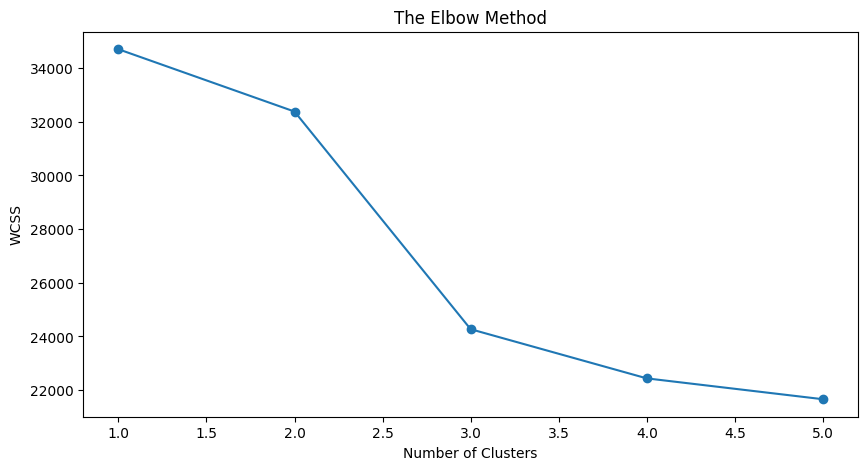

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(range(1,len(wcss)+1),wcss,marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
model = KMeans(n_clusters=3,init = 'k-means++',random_state=42)
y_kmeans = model.fit_predict(amazon)
amazon['cluster'] = y_kmeans

/tmp/ipython-input-2952359179.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  amazon.cluster = y_kmeans


In [ ]:
amazon

,Pageurl,Title,Review Text,Review Color,User Verified,Review Date,Review Useful Count,Configuration Text,Rating,Declaration Text
0,0.709048,1.476291,0.480230,-0.516815,-0.179511,-0.989388,0.0,-0.012079,-0.948560,0.027441
1,0.709048,-0.658967,-1.010531,1.934928,-0.179511,0.704922,0.0,-0.012079,-0.162679,0.027441
2,0.876118,-1.188574,-1.512419,1.934928,-0.179511,1.382646,0.0,-0.012079,0.623202,0.027441
3,0.876118,-0.670188,0.197099,-0.516815,-0.179511,-1.599339,0.0,-0.012079,0.623202,0.027441
4,0.876118,-0.670188,-1.060005,-0.516815,-0.179511,0.027198,0.0,-0.012079,0.623202,0.027441
...,...,...,...,...,...,...,...,...,...,...
6850,-0.548727,0.191546,1.018478,-0.516815,-0.179511,0.027198,0.0,-0.012079,0.623202,0.027441
6851,-0.548727,-0.670188,-0.297040,1.934928,-0.179511,-0.040574,0.0,-0.012079,0.623202,0.027441
6852,0.622665,1.652453,-0.799524,-0.516815,-0.179511,0.704922,0.0,-0.012079,-0.948560,0.027441
6853,0.319849,1.171094,-0.674946,-0.516815,-0.179511,0.772694,0.0,-0.012079,0.623202,0.027441


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x_pca = pca.fit_transform(amazon)
x_pca

array([[-1.79850439, -0.62592893],
       [ 0.35000114,  1.17156315],
       [ 1.21761509,  1.80021759],
       ...,
       [-1.48591155, -0.01947216],
       [-0.18274136,  0.04516614],
       [-0.8276822 , -0.2835588 ]])

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=x[:,0],y=x[:,1],hue = amazon['cluster'] ,palette = 'set1' ,s=100)

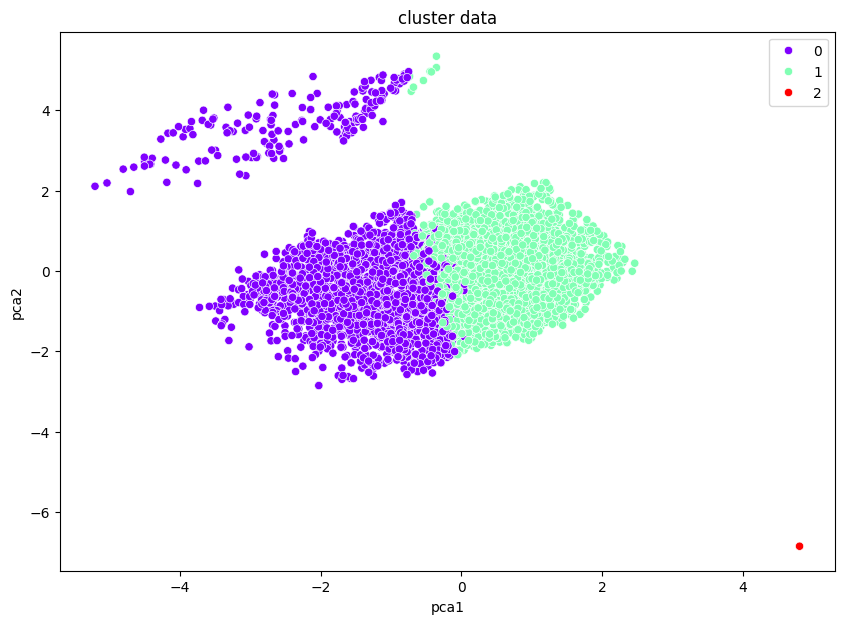

In [ ]:
plt.figure(figsize=(10,7))
sns.scatterplot(x=x_pca[:,0],y=x_pca[:,1],hue = amazon.cluster,palette='rainbow')
plt.title('cluster data')
plt.xlabel('pca1')
plt.ylabel('pca2')
plt.show()